# Generating samples and parsing parameters scan file



In [6]:
from GENE_ML.samplers.uniform import Uniform
import os
import sys
sys.path.append(os.path.join(os.getcwd(),'enchanted-surrogates','src'))
sys.path.append(os.path.join(os.getcwd(),'GENE_UQ'))
from parsers.GENEparser import GENE_scan_parser


parameters = ['box-kymin', '_grp_species_1-omt', 'species-omn']
bounds = [(0.05,1), (10,70), (5,60)]
num_samples = 5000
sampler = Uniform(parameters=parameters, bounds=bounds, num_samples=num_samples)

##Executor
#Here the executor would divide the samples into batches that will be ran in paralell in seperate sbatch jobs
# it will also make the batch scripts to run each one.

##    Parser args
base_params_path = os.path.join(os.getcwd(),'parameters_base_dp')
parser = GENE_scan_parser(base_params_path)
parser.write_input_file(sampler.samples, run_dir=os.getcwd(), file_name='parameters_5000')

## Runner
# the runner would ssh into lumi and run the parameter files

# if project == 'UQ':
#     #UQ
#     ##Sampler args dependant on sampler chosen
#     parameters = ['box-kymin', '_grp_species_0-omt', '_grp_species_1-omt']
#     bounds = [(0.1,100.0),(2,3.5), (4,6.75)]
#     ##Parser args
#     base_params_path = os.path.join(os.getcwd(),'parameters_base_uq')


#Sampling the data

Writing to /home/djdaniel/DEEPlasma


# Making Surrogate Model and Visualising Performance

<class 'type'>
Initialising dataset
Loading Data From scanlogs/100_3p_scan.log
NaN percentage =  50.0


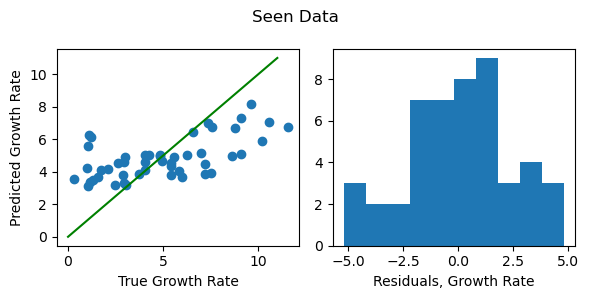

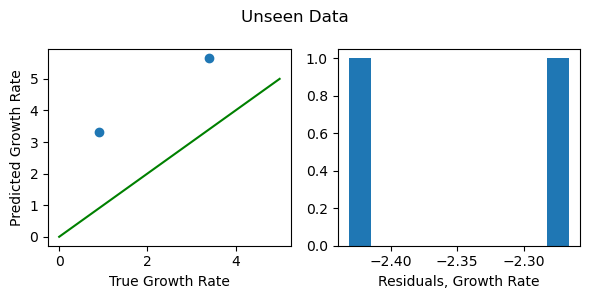

In [3]:

#imports

from GENE_ML.dataset.ScanData import ScanData
from GENE_ML.models.SVM import SVM
from GENE_ML import visualise as vis

from GENE_ML.samplers import uniform


#Sampling already done, gene has been ran
print(type(ScanData))
data_set = ScanData(name='100_3p', test_percentage=3)
svm = SVM()
svm.train(data_set.x_train, data_set.growthrate_train)

growthrate_predict_seen = svm.predict(data_set.x_train)
growthrate_predict_unseen = svm.predict(data_set.x_test)

vis.residuals(data_set.growthrate_train, growthrate_predict_seen, var_name='Growth Rate', title='Seen Data')
vis.residuals(data_set.growthrate_test, growthrate_predict_unseen, var_name='Growth Rate', title='Unseen Data')



